In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# 1. Import the dataset and understand it.


In [6]:
# To read the loan dataset 
df=pd.read_csv('loan.csv')
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_length,...,verification_status,loan_status,purpose,dti,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,last_pymnt_d,last_pymnt_amnt
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,10+ years,...,Verified,Fully Paid,credit_card,27.65,5863.155187,5833.84,5000.00,863.16,15-Jan,171.62
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,< 1 year,...,Source Verified,Charged Off,car,1.00,1008.710000,1008.71,456.46,435.17,13-Apr,119.66
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,10+ years,...,Not Verified,Fully Paid,small_business,8.72,3005.666844,3005.67,2400.00,605.67,14-Jun,649.91
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,10+ years,...,Source Verified,Fully Paid,other,20.00,12231.890000,12231.89,10000.00,2214.92,15-Jan,357.48
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,1 year,...,Source Verified,Current,other,17.94,3513.330000,3513.33,2475.94,1037.39,16-May,67.79


# 2. List down the number of rows and columns.

In [12]:
# To fetch how many rows and column are persent in dataset
df.shape

(39717, 21)

In [4]:
rows=len(df.axes[1])
columns=len(df.axes[0])
print(rows)
print(columns)

21
39717


# 3. ‘Int_rate’ column is character type. With the help of lambda function convert into float type.



In [5]:
#We can use astype() to convert the character to float data type
df['int_rate']=df['int_rate'].apply(lambda  x: x.rstrip("%")).astype(float)
df['int_rate']

0        10.65
1        15.27
2        15.96
3        13.49
4        12.69
         ...  
39712     8.07
39713    10.28
39714     8.07
39715     7.43
39716    13.75
Name: int_rate, Length: 39717, dtype: float64

In [6]:
df['int_rate']=df['int_rate'].apply(lambda  row:float(row))
df['int_rate']

0        10.65
1        15.27
2        15.96
3        13.49
4        12.69
         ...  
39712     8.07
39713    10.28
39714     8.07
39715     7.43
39716    13.75
Name: int_rate, Length: 39717, dtype: float64

# 4. Check the datatype of each column.



In [7]:
# To checking the data type of all column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   39717 non-null  int64  
 1   member_id            39717 non-null  int64  
 2   loan_amnt            39717 non-null  int64  
 3   funded_amnt          39717 non-null  int64  
 4   funded_amnt_inv      39717 non-null  float64
 5   term                 39717 non-null  object 
 6   int_rate             39717 non-null  float64
 7   installment          39717 non-null  float64
 8   grade                39717 non-null  object 
 9   emp_length           38642 non-null  object 
 10  annual_inc           39717 non-null  float64
 11  verification_status  39717 non-null  object 
 12  loan_status          39717 non-null  object 
 13  purpose              39717 non-null  object 
 14  dti                  39717 non-null  float64
 15  total_pymnt          39717 non-null 

In [8]:
df.dtypes

id                       int64
member_id                int64
loan_amnt                int64
funded_amnt              int64
funded_amnt_inv        float64
term                    object
int_rate               float64
installment            float64
grade                   object
emp_length              object
annual_inc             float64
verification_status     object
loan_status             object
purpose                 object
dti                    float64
total_pymnt            float64
total_pymnt_inv        float64
total_rec_prncp        float64
total_rec_int          float64
last_pymnt_d            object
last_pymnt_amnt        float64
dtype: object

# 5. Cleaning the dataset- Remove the columns having complete NaN value in the entire dataset.



In [24]:
# To fetch the null value in columns we can use isnull function
df.isnull().sum()

id                        0
member_id                 0
loan_amnt                 0
funded_amnt               0
funded_amnt_inv           0
term                      0
int_rate                  0
installment               0
grade                     0
emp_length             1070
annual_inc                0
verification_status       0
loan_status               0
purpose                   0
dti                       0
total_pymnt               0
total_pymnt_inv           0
total_rec_prncp           0
total_rec_int             0
last_pymnt_d             66
last_pymnt_amnt           0
dtype: int64

In [21]:
# To drop the columns we can use drop() function or dropna() function
df.drop(['emp_length','last_pymnt_d'],axis=1)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,annual_inc,verification_status,loan_status,purpose,dti,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,last_pymnt_amnt
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,24000.0,Verified,Fully Paid,credit_card,27.65,5863.155187,5833.84,5000.00,863.16,171.62
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,30000.0,Source Verified,Charged Off,car,1.00,1008.710000,1008.71,456.46,435.17,119.66
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,12252.0,Not Verified,Fully Paid,small_business,8.72,3005.666844,3005.67,2400.00,605.67,649.91
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,49200.0,Source Verified,Fully Paid,other,20.00,12231.890000,12231.89,10000.00,2214.92,357.48
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,80000.0,Source Verified,Current,other,17.94,3513.330000,3513.33,2475.94,1037.39,67.79
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,92187,92174,2500,2500,1075.0,36 months,8.07%,78.42,A,110000.0,Not Verified,Fully Paid,home_improvement,11.33,2822.969293,1213.88,2500.00,322.97,80.90
39713,90665,90607,8500,8500,875.0,36 months,10.28%,275.38,C,18000.0,Not Verified,Fully Paid,credit_card,6.40,9913.491822,1020.51,8500.00,1413.49,281.94
39714,90395,90390,5000,5000,1325.0,36 months,8.07%,156.84,A,100000.0,Not Verified,Fully Paid,debt_consolidation,2.30,5272.161128,1397.12,5000.00,272.16,0.00
39715,90376,89243,5000,5000,650.0,36 months,7.43%,155.38,A,200000.0,Not Verified,Fully Paid,other,3.72,5174.198551,672.66,5000.00,174.20,0.00


# 6. Write the code to find the value counts of the ‘loan_status’ category column and filter only the ‘fully paid’ and ‘charged off’ categories.



In [ ]:
# To fetch the total value counts of the loan_status we can use value_counts()
df['loan_status'].value_counts()

In [17]:
print(df['loan_status'].value_counts()['Fully Paid'])
print(df['loan_status'].value_counts()['Charged Off'])


32950
5627


# 7.Filter the ‘Emp_Len’ column to extract the numerical value from the string.


In [13]:
df.emp_length.str.extract('(\d+)')

,0
0,10
1,1
2,10
3,10
4,1
...,...
39712,4
39713,3
39714,1
39715,1


# 8.Using the Lambda function, remove the month from the ‘term’ column such that ‘36 months’, ‘60 months’ appear as 36 and 60 respectively.


In [22]:
df=df.assign(term=lambda x: x['term'].str.extract('(\d+)'))
df

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_length,...,verification_status,loan_status,purpose,dti,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,last_pymnt_d,last_pymnt_amnt
0,1077501,1296599,5000,5000,4975.0,36,10.65%,162.87,B,10+ years,...,Verified,Fully Paid,credit_card,27.65,5863.155187,5833.84,5000.00,863.16,15-Jan,171.62
1,1077430,1314167,2500,2500,2500.0,60,15.27%,59.83,C,< 1 year,...,Source Verified,Charged Off,car,1.00,1008.710000,1008.71,456.46,435.17,13-Apr,119.66
2,1077175,1313524,2400,2400,2400.0,36,15.96%,84.33,C,10+ years,...,Not Verified,Fully Paid,small_business,8.72,3005.666844,3005.67,2400.00,605.67,14-Jun,649.91
3,1076863,1277178,10000,10000,10000.0,36,13.49%,339.31,C,10+ years,...,Source Verified,Fully Paid,other,20.00,12231.890000,12231.89,10000.00,2214.92,15-Jan,357.48
4,1075358,1311748,3000,3000,3000.0,60,12.69%,67.79,B,1 year,...,Source Verified,Current,other,17.94,3513.330000,3513.33,2475.94,1037.39,16-May,67.79
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,92187,92174,2500,2500,1075.0,36,8.07%,78.42,A,4 years,...,Not Verified,Fully Paid,home_improvement,11.33,2822.969293,1213.88,2500.00,322.97,10-Jul,80.90
39713,90665,90607,8500,8500,875.0,36,10.28%,275.38,C,3 years,...,Not Verified,Fully Paid,credit_card,6.40,9913.491822,1020.51,8500.00,1413.49,10-Jul,281.94
39714,90395,90390,5000,5000,1325.0,36,8.07%,156.84,A,< 1 year,...,Not Verified,Fully Paid,debt_consolidation,2.30,5272.161128,1397.12,5000.00,272.16,8-Apr,0.00
39715,90376,89243,5000,5000,650.0,36,7.43%,155.38,A,< 1 year,...,Not Verified,Fully Paid,other,3.72,5174.198551,672.66,5000.00,174.20,8-Jan,0.00


# 9. Create a new column as risky_loan_applicant by comparing loan_amnt
# and funded_amnt with the following criteria -
# If loan_amnt is less than equals to funded_amnt set it as ‘0’ else set it as ‘1’.




In [23]:
df['risky loan']=np.where((df['loan_amnt']<=df['funded_amnt']),0,1)  
print(df)

            id  member_id  loan_amnt  funded_amnt  funded_amnt_inv term  \
0      1077501    1296599       5000         5000           4975.0   36   
1      1077430    1314167       2500         2500           2500.0   60   
2      1077175    1313524       2400         2400           2400.0   36   
3      1076863    1277178      10000        10000          10000.0   36   
4      1075358    1311748       3000         3000           3000.0   60   
...        ...        ...        ...          ...              ...  ...   
39712    92187      92174       2500         2500           1075.0   36   
39713    90665      90607       8500         8500            875.0   36   
39714    90395      90390       5000         5000           1325.0   36   
39715    90376      89243       5000         5000            650.0   36   
39716    87023      86999       7500         7500            800.0   36   

      int_rate  installment grade emp_length  ...  loan_status  \
0       10.65%       162.87     B

# 10.Using the bar plot visualize the loan_status column against categorical column grade, term, verification_status.
# Write the observation from each graph.



In [35]:
pd.crosstab(df.loan_status,df.grade)

grade,A,B,C,D,E,F,G
loan_status,,,,,,,
Charged Off,602,1425,1347,1118,715,319,101
Current,40,345,264,222,179,73,17
Fully Paid,9443,10250,6487,3967,1948,657,198


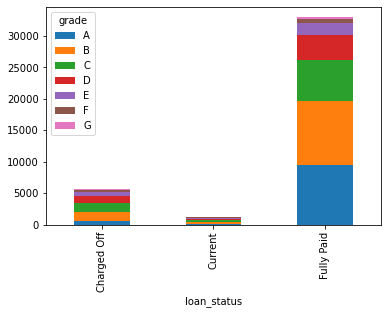

In [32]:
pd.crosstab(df['loan_status'],df['grade']).plot(kind='bar',stacked=True)
plt.show()

# observation
1.we can see above most of the customer are fully paid a loan amount in each grade

2.we can also see average customer are charged off aginst loan in each grade


# loan status against categorical columns term


In [4]:
pd.crosstab(df.loan_status,df.term)

term,36 months,60 months
loan_status,,
Charged Off,3227,2400
Current,0,1140
Fully Paid,25869,7081


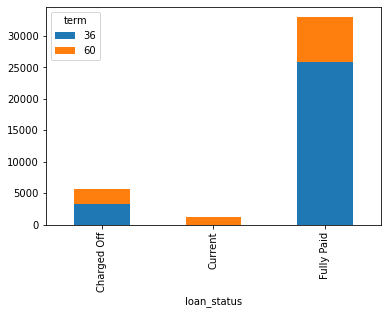

In [33]:
pd.crosstab(df['loan_status'],df['term']).plot(kind='bar',stacked=True)
plt.show()

# observation:
1.FULLY PAID -most of the customer have taking loan to pay in 36 month of term

2.Current-customer has taken a loan aginst 60 month of term to pay the amount

# loan_status against categorical column verification _status


In [37]:
pd.crosstab(df.loan_status,df.verification_status)

verification_status,Not Verified,Source Verified,Verified
loan_status,,,
Charged Off,2142,1434,2051
Current,227,310,603
Fully Paid,14552,8243,10155


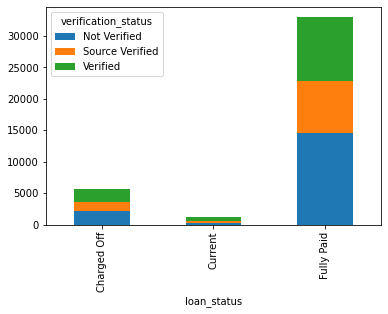

In [38]:
pd.crosstab(df['loan_status'],df['verification_status']).plot(kind='bar',stacked=True)
plt.show()

# observation:
1. FULLY PAID-Here we can see above most of the customer are not verified for loan 

# 11.Using a user defined function convert the ‘emp_len’ column into
categorical column as follows -
If emp_len is less than equals to 1 then recode as ‘fresher’.
If emp_len is greater than 1 and less than 3 then recode as ‘junior’.
If emp_len is greater than 3 and less than 7 then recode as ‘senior’
If emp_len is greater than 7 then recode as ‘expert’.


In [14]:
def convert(emp_length):
    
    if emp_length<=1:
        return 'fresher'
                
    elif emp_length>1 and emp_length<3:
        return 'junior'
                    
    elif emp_length>3 and emp_length<7:
        return 'senior'
    else:

        return 'expert'

         


In [16]:
i=int(input())
convert(i)

89


'expert'

# 12.Find the sum of ‘loan_amnt’ for each grade and display the distribution of ‘loan_amnt’ using a pie plot


In [29]:
import numpy as np
df1=pd.pivot_table(df,index=['grade'],values=['loan_amnt'],aggfunc=np.sum)#it wiil give total sum
df1

,loan_amnt
grade,
A,86982400
B,133651350
C,89115825
D,65160400
E,45037900
F,19263100
G,6391675


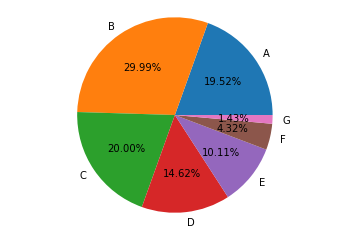

In [6]:
grade='A','B','C','D','E','F','G'
loan_amnt=[86982400,133651350,89115825,65160400,45037900,19263100,6391675]
plt.pie(loan_amnt,labels=grade,autopct='%1.2f%%')
plt.axis('equal')

 

plt.show()